In [85]:
# Bora Güzel
# 2446235

# PART II #

#### Reading the data and importing libraries ####

In [132]:
import pandas as pd #to read the data
import numpy as np 
from sklearn.preprocessing import MinMaxScaler #to normalize the points
scaler= MinMaxScaler() #min max normalization
import time # to calculate the time elapsed for computing
import matplotlib.pyplot as plt # to plot the necessary graphs

import seaborn as sns

In [104]:
dataset=pd.read_excel("/Users/boraguzel/Downloads/Universities.xls",header=1) # header=1 to read the correct row as header
dataset.head(5)

,College Name,State,Public (1)/ Private (2),Math SAT,Verbal SAT,ACT,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,...,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska Pacific University,AK,2.0,490.0,482.0,20.0,193.0,146.0,55.0,16.0,...,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
2,University of Alaska at Fairbanks,AK,1.0,499.0,462.0,22.0,1852.0,1427.0,928.0,NaN,...,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
3,University of Alaska Southeast,AK,1.0,NaN,NaN,NaN,146.0,117.0,89.0,4.0,...,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
4,University of Alaska at Anchorage,AK,1.0,459.0,422.0,20.0,2065.0,1598.0,1162.0,NaN,...,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN


#### Preprocessing ####

In [105]:
df=dataset.dropna()

In [106]:

df.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 1 to 1292
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              206 non-null    object 
 1   State                     206 non-null    object 
 2   Public (1)/ Private (2)   206 non-null    float64
 3   Math SAT                  206 non-null    float64
 4   Verbal SAT                206 non-null    float64
 5   ACT                       206 non-null    float64
 6   # appli. rec'd            206 non-null    float64
 7   # appl. accepted          206 non-null    float64
 8   # new stud. enrolled      206 non-null    float64
 9   % new stud. from top 10%  206 non-null    float64
 10  % new stud. from top 25%  206 non-null    float64
 11  # FT undergrad            206 non-null    float64
 12  # PT undergrad            206 non-null    float64
 13  in-state tuition          206 non-null    float64
 14  out-of-state t

### a-) k-means for continuous measurements, deciding the best k ###

In [107]:
continuous_df = df.drop(columns=["College Name", "State", "Public (1)/ Private (2)"])
normalized_array = scaler.fit_transform(continuous_df)
continuous_df

,Math SAT,Verbal SAT,ACT,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
1,490.0,482.0,20.0,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
10,575.0,525.0,26.0,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
12,513.0,446.0,23.0,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
38,564.0,525.0,26.0,823.0,721.0,274.0,52.0,87.0,954.0,6.0,8800.0,8800.0,1935.0,1260.0,325.0,500.0,1200.0,82.0,13.1,63.0
39,509.0,484.0,23.0,605.0,405.0,284.0,24.0,53.0,961.0,99.0,6398.0,6398.0,1450.0,2222.0,148.0,400.0,1350.0,68.0,13.3,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,557.0,513.0,24.0,587.0,501.0,211.0,28.0,52.0,735.0,28.0,15200.0,15200.0,1840.0,2260.0,190.0,350.0,650.0,87.0,9.4,64.0
1269,614.0,553.0,24.0,1334.0,1243.0,568.0,30.0,56.0,1946.0,95.0,12140.0,12140.0,2355.0,2095.0,75.0,425.0,1100.0,74.0,15.1,88.0
1275,525.0,460.0,23.0,5729.0,4520.0,1957.0,20.0,52.0,8516.0,1264.0,2208.0,6996.0,1565.0,1140.0,1070.0,279.0,1260.0,80.0,19.3,61.0
1285,443.0,394.0,20.0,582.0,498.0,172.0,21.0,44.0,799.0,78.0,10468.0,10468.0,1574.0,1806.0,92.0,660.0,1800.0,40.0,11.5,52.0


#### k_means function from part 1 ####

In [91]:
def k_means_clustering(df, k, num_inits, max_iter=100):  
    start_time = time.time()  # Start timing

    best_sse = float('inf')  # Initialize best SSE to infinity
    best_labels = None
    best_centroids = None
    

    for init in range(num_inits):
        # Randomly select initial centroids
        initial_indices = np.random.choice(len(df), k, replace=False)
        centroids = df[initial_indices]
        
        for iteration in range(max_iter):
            # Calculate distances between data points and centroids
            distances = []
            for point in df:
                distance_to_centroids = []
                for centroid in centroids:
                    # Euclidean distance
                    distance = np.sqrt(np.sum((point - centroid) ** 2))
                    distance_to_centroids.append(distance)
                distances.append(distance_to_centroids)
            distances = np.array(distances)
            
            # Assign points to the nearest centroid
            labels = np.argmin(distances, axis=1)
            
            # Recalculate centroids
            new_centroids = []
            for i in range(k):
                points_in_cluster = df[labels == i]
                if len(points_in_cluster) > 0:
                    new_centroid = points_in_cluster.mean(axis=0)
                else:
                    # If a cluster has no points, reinitialize its centroid
                    new_centroid = df[np.random.choice(len(df))]
                new_centroids.append(new_centroid)
            new_centroids = np.array(new_centroids)
            
            # Check for convergence
            if np.allclose(centroids, new_centroids):
                break
            centroids = new_centroids
        
        # Calculate SSE for this initialization
        sse = 0
        for i in range(k):
            points_in_cluster = df[labels == i]
            sse += np.sum((points_in_cluster - centroids[i]) ** 2)
        
        # Update best SSE and labels
        if sse < best_sse:
            best_sse = sse
            best_labels = labels.copy()
            best_centroids = centroids.copy()
            best_iteration = iteration  # Number of iterations taken for the best initialization

    # End timing
    end_time = time.time()
    total_time = end_time - start_time

    # Cluster sizes
    cluster_sizes = np.bincount(best_labels, minlength=k) # minglength=k ensures that even if label(cluster) has 0 count it will be shown

    # Output results


    return best_labels, best_centroids, best_sse, total_time, cluster_sizes, best_iteration


In [92]:
# Number of initializations
np.random.seed(2446235)
num_inits = 500
list_sse_k_means=[]
# I gave a limit to iterations to terminate even if convergence isn't reached
max_iter = 100
for k  in range(3,11):
    labels, best_centroids, sse_k, total_time, cluster_sizes, best_iteration = k_means_clustering(normalized_array, k, num_inits, max_iter)
    list_sse_k_means.append(sse_k)

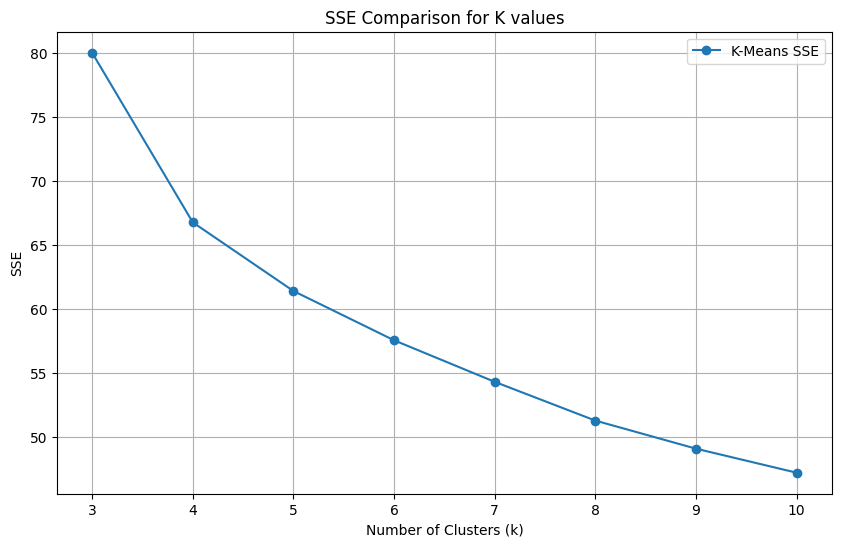

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(range(3, 11), list_sse_k_means, label="K-Means SSE", marker="o")
plt.title("SSE Comparison for K values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE")
plt.legend()
plt.grid(True)
plt.show()

In [94]:
k=5 # As an elbow rule.
labels, best_centroids, sse_k, total_time, cluster_sizes, best_iteration = k_means_clustering(normalized_array, k, num_inits, max_iter)

In [102]:
continuous_columns = continuous_df.columns
normalized_df = pd.DataFrame(normalized_array, columns=continuous_columns)
normalized_df["Cluster"] = labels

summary_stats = normalized_df.groupby("Cluster").agg(["mean", "max", "min", "median", "std"])
display(summary_stats)


Math SAT                                         Verbal SAT  \
             mean       max       min    median       std       mean   
Cluster                                                                
0        0.316748  0.519417  0.000000  0.330097  0.100117   0.381879   
1        0.580906  0.696602  0.470874  0.589806  0.093472   0.574499   
2        0.489409  0.703883  0.327670  0.483010  0.080241   0.519927   
3        0.739731  1.000000  0.582524  0.742718  0.105790   0.813974   
4        0.506404  0.776699  0.337379  0.502427  0.082815   0.583906   

                                                 ... stud./fac. ratio  \
              max       min    median       std  ...             mean   
Cluster                                          ...                    
0        0.633238  0.000000  0.385387  0.124014  ...         0.427123   
1        0.667622  0.489971  0.565903  0.078716  ...         0.532213   
2        0.719198  0.415473  0.507163  0.072023  ...         0.526738   
3        1.000000  0.595989  0.792264  0.105879  ...         0.202327   
4        0.765043  0.372493  0.573066  0.087562  ...         0.338362   

                                                Graduation rate            \
              max       min    median       std            mean       max   
Cluster                                                                     
0        1.000000  0.075630  0.390756  0.169615        0.391028  1.000000   
1        0.760504  0.302521  0.567227  0.168899        0.469256  0.640777   
2        0.760504  0.243697  0.537815  0.131327        0.387467  0.631068   
3        0.428571  0.000000  0.216387  0.102952        0.669903  0.825243   
4        0.693277  0.138655  0.323529  0.098894        0.546497  0.825243   

                                       
              min    median       std  
Cluster                                
0        0.000000  0.359223  0.200500  
1        0.291262  0.504854  0.133638  
2        0.184466  0.378641  0.116867  
3        0.495146  0.665049  0.101269  
4        0.262136  0.524272  0.129233  

[5 rows x 100 columns]

In [96]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Math SAT                  206 non-null    float64
 1   Verbal SAT                206 non-null    float64
 2   ACT                       206 non-null    float64
 3   # appli. rec'd            206 non-null    float64
 4   # appl. accepted          206 non-null    float64
 5   # new stud. enrolled      206 non-null    float64
 6   % new stud. from top 10%  206 non-null    float64
 7   % new stud. from top 25%  206 non-null    float64
 8   # FT undergrad            206 non-null    float64
 9   # PT undergrad            206 non-null    float64
 10  in-state tuition          206 non-null    float64
 11  out-of-state tuition      206 non-null    float64
 12  room                      206 non-null    float64
 13  board                     206 non-null    float64
 14  add. fees 

In [125]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=["float64", "int64"])
# Group by Cluster and calculate summary statistics
summary_stats = numeric_df.groupby("Cluster").agg(["mean", "max", "min", "std"])

# Display the statistics for analysis
print("==== Summary Statistics by Cluster ====")
print(summary_stats)



==== Summary Statistics by Cluster ====
        Public (1)/ Private (2)                        Math SAT                \
                           mean  max  min       std        mean    max    min   
Cluster                                                                         
0                      1.862069  2.0  1.0  0.347839  460.500000  544.0  330.0   
1                      1.000000  1.0  1.0  0.000000  569.333333  617.0  524.0   
2                      1.090909  2.0  1.0  0.291937  531.636364  620.0  465.0   
3                      2.000000  2.0  2.0  0.000000  634.769231  742.0  570.0   
4                      1.975904  2.0  1.0  0.154281  538.638554  650.0  469.0   

                    Verbal SAT                                 ACT        \
               std        mean    max    min        std       mean   max   
Cluster                                                                    
0        41.248179  423.275862  511.0  290.0  43.280721  20.706897  25.0   
1      

In [123]:
categorical_summary = df.groupby("Cluster")["State"].value_counts(normalize=True)
public_private_summary = df.groupby("Cluster")["Public (1)/ Private (2)"].value_counts(normalize=True)

# Increase display limits
pd.set_option("display.max_rows", 200)  # Adjust as needed
pd.set_option("display.max_columns", 100)  # Adjust as neededc‚


# Display the full data
print("==== State Distribution by Cluster ====")
print(categorical_summary)

print("\n==== Public/Private Distribution by Cluster ====")
print(public_private_summary)




==== State Distribution by Cluster ====
Cluster  State
0        TX       0.137931
         OH       0.103448
         MO       0.068966
         NC       0.068966
         CO       0.051724
         FL       0.051724
         IN       0.051724
         PA       0.051724
         SC       0.051724
         IA       0.034483
         MI       0.034483
         NM       0.034483
         NY       0.034483
         OK       0.034483
         TN       0.034483
         AK       0.017241
         AL       0.017241
         AR       0.017241
         CA       0.017241
         GA       0.017241
         KY       0.017241
         MT       0.017241
         VT       0.017241
         WV       0.017241
1        TX       0.333333
         AZ       0.166667
         IL       0.166667
         MI       0.166667
         MN       0.166667
2        NY       0.272727
         NC       0.121212
         OH       0.090909
         TX       0.060606
         AR       0.030303
         AZ       0.030303


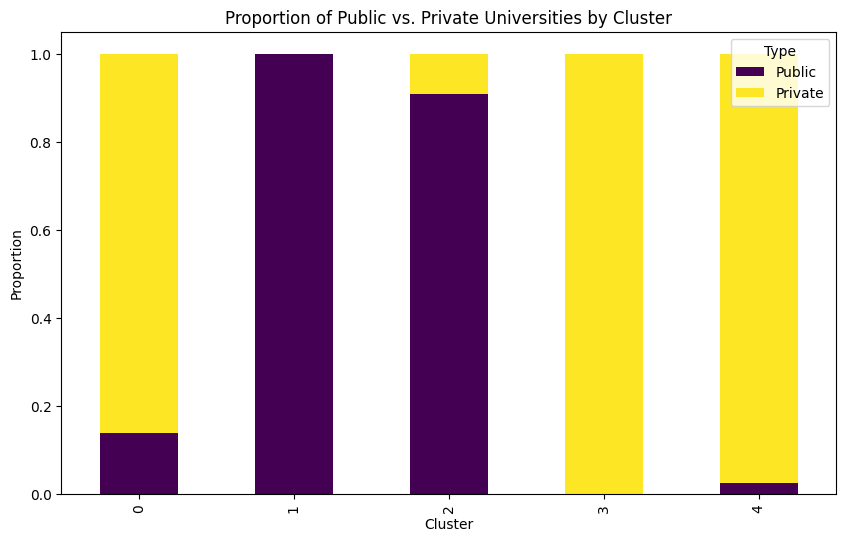

In [127]:
categorical_summary = df.groupby("Cluster")["Public (1)/ Private (2)"].value_counts(normalize=True).unstack()

categorical_summary.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Proportion of Public vs. Private Universities by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.legend(["Public", "Private"], title="Type")
plt.show()

/var/folders/sp/srgnv_cn7z9_kh3x1btm8r9r0000gn/T/ipykernel_5834/1923991335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Graduation rate", data=df, palette="coolwarm")


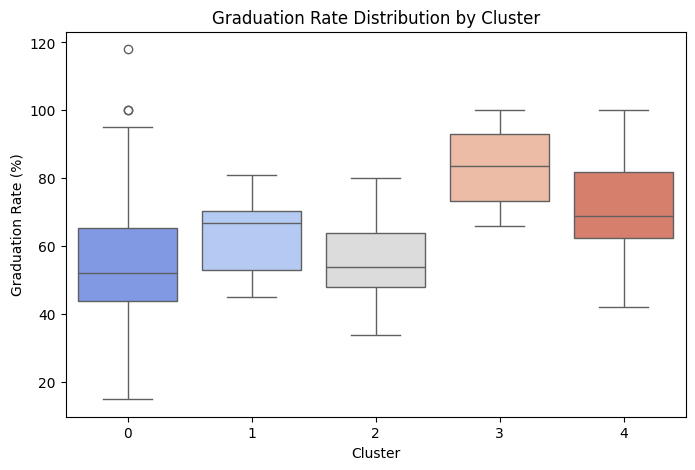

In [133]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Cluster", y="Graduation rate", data=df, palette="coolwarm")
plt.title("Graduation Rate Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Graduation Rate (%)")
plt.show()